### Statistical tests in Python

Today I'm giving you some data as files in URLs.  You will need to load those data into Python.  You can do this many different ways, though some require less code than others.

In this exercise, you will need to:
* Plot some data with error bars
* * s.d.
* * s.e.m.
* * 95 % CI
* Perform one sample _t_-tests of means against a reference mean
* Perform two sample _t_-tests of means between two treatments
* Perform paired _t_-tests of means from before and after treatment

Some modules you will probably need:
```
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
```

As you have noticed I'm giving you less and less starter code.  This is intentional and is meant for you to practice your Google skills for finding the right modules and example code.  Have fun!

Start with your imports...

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

#### Data sets

* Data set 1: [https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset1.txt](https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset1.txt)
* Data set 2: [https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset2.txt](https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset2.txt)
* Data set 3: [https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset3.txt](https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset3.txt)

Begin by downloading the data sets and loading them into pandas, numpy, or whatevs floats your Python boat.

In [5]:
d1 = pd.read_csv('https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset1.txt'
                , names=['data'])

d1.head()

,data
0,34.490030
1,6.736579
2,19.580486
3,41.672809
4,62.622045



Let's continue by making three figures (one for each data set) with three panels each.  The first panel should plot the data with error bars as the standard deviation.  The second panel should show the error bars as the s.e.m.  The final panel should show the error bar with the 95% CI. This last panel will be tough and may actually be easier to do later.  What kind of plot will you use?  Columns?  Bars?  Boxplot?  

Hint: USE A FUNCTION!  Not a subtle hint.  But you will run essentially the same code for all three data sets so a function makes sense, riiiight?!

Create the function:

In [14]:
def pointplot(data, label='d1'):
    mean = data.mean().values[0]
    std = data.std().values[0]
    sem = data.sem().values[0]
    n = data.count().values[0]
    h = sem * stats.t.ppf(0.95, n - 1)
    err = [std, sem, h]
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
    x = 1
    y = data.values
    w = 0.1
    xvals = x + np.random.choice(np.linspace(-w, w, n+1), replace=False, size=n)

    for i in range(3):
        ax[i].bar(x,
               height=mean,
               yerr=err[i],    # error bars
               capsize=12, # error bar cap width in points
               width=w,    # bar width
               tick_label=[label],
               alpha=0)

        ax[i].scatter(xvals, y, color='b', s=100)
        ax[i].set_xlim([0.75, 1.25])
        ax[i].set_ylim([0, 80])

Call it on data set 1

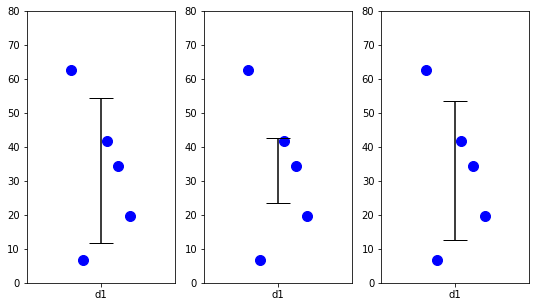

In [15]:
pointplot(d1, label='d1')

Call it on data set 2

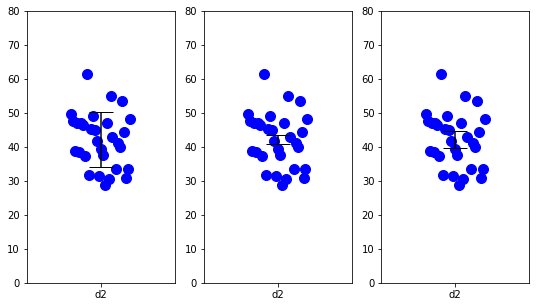

In [16]:
d2 = pd.read_csv('https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset2.txt'
                , names=['data'])
pointplot(d2, label='d2')

Call it on data set 3

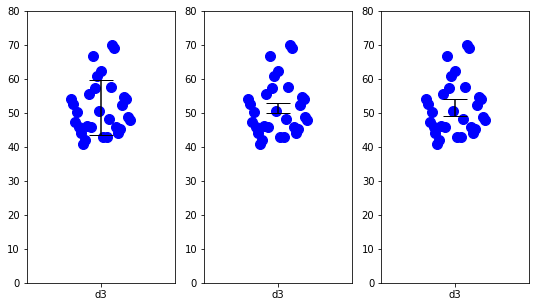

In [17]:
d3 = pd.read_csv('https://raw.githubusercontent.com/UWDIRECT/UWDIRECT.github.io/master/Wi18_content/DSMCER/L8.dataset3.txt'
                , names=['data'])
pointplot(d3, label='d3')

#### Great.  Now let's start doing some hypothesis testing in Python.

##### The one sided _t_-test of means.
You have reason to believe that all the data sets, which were obtained using the same experimental method, but under different conditions, could be compared to the published literature value of the mean.  The value you find in the literature is **42.0**.  Perform a statistical test to determine the test statistic and _p_-value that compares each of the three datasets to this reference value.  


In [88]:
for datasetA in [d1, d2, d3]:
    [t, p] = stats.ttest_1samp(datasetA, 42)
    print(p)

[0.40039694]
[0.910807]
[4.33066733e-07]



Were any significant?  How did you know?

Type $\alpha^{2}$ with LaTeX

$\alpha^{2}$

#### The two sided t-test of means.
Now you want to investigate if the three different treatments' means are similar to each other.  Perform pairwise statistical tests of the means.  Do this using whatever language constructs work best for you (for loops, list comprehensions, ...).

Find a way to present these data to a journal article reader.  A table?  A figure?

In [101]:
for datasetA in [d1, d2, d3]:
    for datasetB in [d1, d2, d3]:
        [t, p] = stats.ttest_ind(datasetA, datasetB)
        print(p)

[1.]
[0.08190099]
[0.00098864]
[0.08190099]
[1.]
[3.08384702e-05]
[0.00098864]
[3.08384702e-05]
[1.]


##### Paired test of means.

Now you learn that data set 2 and data set 3 are paired.  That is, the same lab samples were used with data set 2 being before treatment with some compound and data set 3 after treatment.  Perform a statistical test to see if the treatment had a statistically significant impact on the lab samples.

In [103]:
[t, p] = stats.ttest_rel(d2, d3)
print(p)

[9.69019041e-06]


What is your conclusion about the treatment?